In [1]:
%matplotlib inline
#some basic imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

#TODO: add your imports here


#seting up some styles
import seaborn as sns
sns.set_context("paper")
sns.set_style("whitegrid")

#avoid Font-problem in plots for ACM/IEEE papers
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

experiment_name = "Tracing"

In [ ]:
from load import load
activations,perfromance = load()

experimentes = perfromance["experiment"].unique()

## Experiment Plots

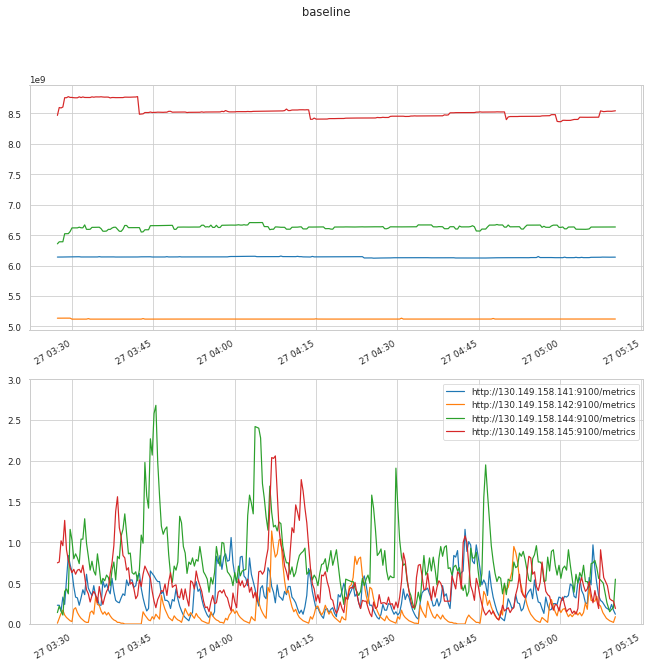

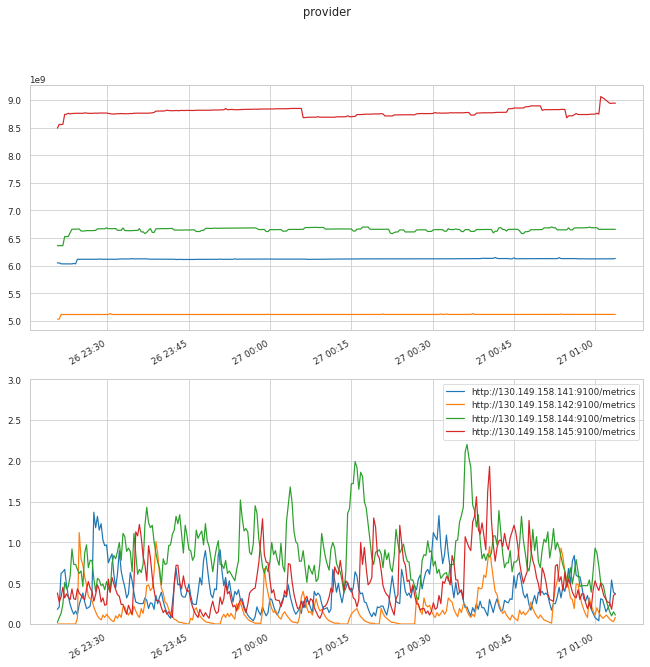

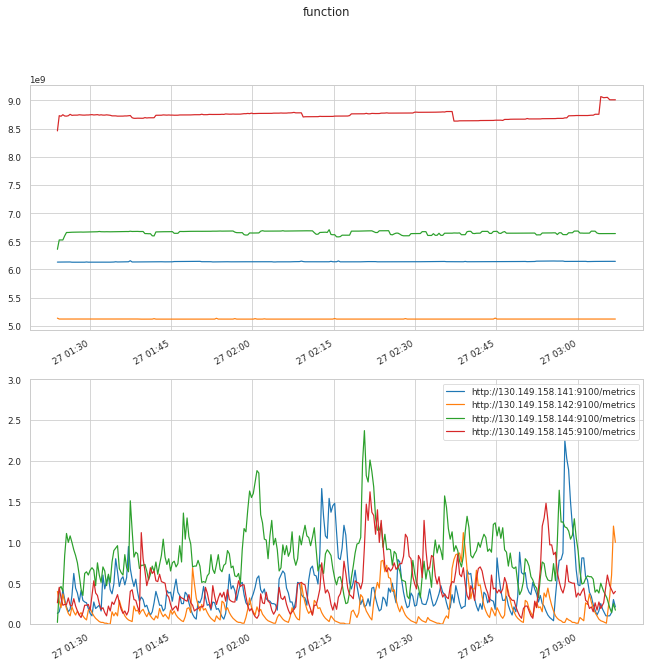

In [4]:
for exp in experimentes:
    fig = plt.figure(figsize=(11,11))
    gs = fig.add_gridspec(ncols=1, nrows=2,hspace=0.20)
    X = perfromance[perfromance["experiment"] == exp]
    mem = X.groupby(["node"]).resample("5m")["node_memory_Active"]
    ax = fig.add_subplot(gs[0])
    mem.plot(ax=ax)

    cpu = X.groupby(["node"]).resample("5m")["node_load1"]
    ax = fig.add_subplot(gs[1])
    cpu.plot(ax=ax)
    ax.set_ylim([0.0,3.0])
    plt.legend()
    plt.suptitle(exp)



In [5]:
activations['start'] = pd.to_datetime(activations['start'],unit='ms')
activations['end'] = pd.to_datetime(activations['end'],unit='ms')

activations["ELat"] = (activations["end"] - activations["start"]).dt.total_seconds()

activations.groupby(["experiment"])["ELat"].describe()


,count,mean,std,min,25%,50%,75%,max
experiment,,,,,,,,
baseline,296.0,51.838966,39.408884,0.005,0.4350,75.4470,77.78950,121.909
function,290.0,51.059090,39.339011,0.012,0.4775,78.5950,80.88675,198.414
provider,296.0,52.813331,39.253060,0.012,0.5255,78.9165,81.25075,204.264


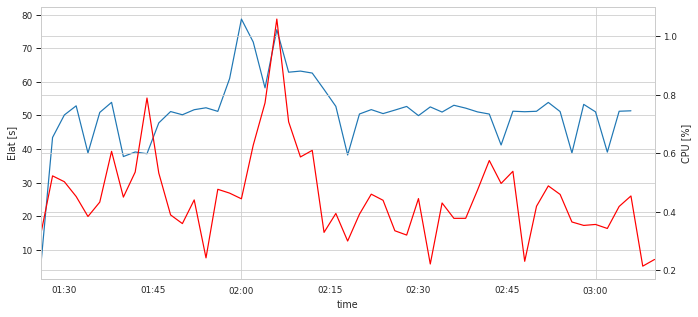

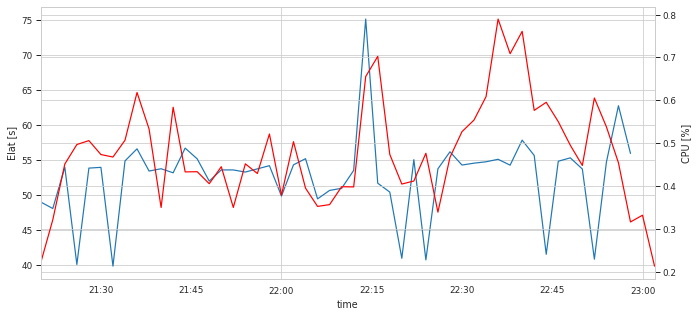

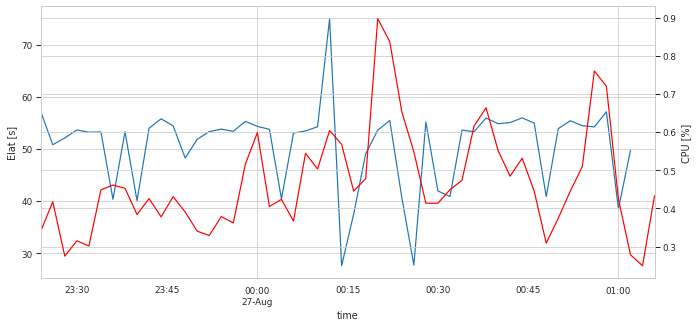

In [40]:
for exp in experimentes:
    fig = plt.figure(figsize=(11,5))
    gs = fig.add_gridspec(ncols=1, nrows=1,hspace=0.20)
    X = activations[activations["experiment"] == exp]
    ax = fig.add_subplot(gs[0])
    X.set_index("start").resample("2min")["ELat"].mean().plot(ax=ax)
    ax.set_ylabel("Elat [s]")
    ax.set_xlabel("time")
    X = perfromance[perfromance["experiment"] == exp]
    X.index = X.index.shift(-2,freq="h")
    cpu = X.resample("2min")["node_load1"].mean()
    ax = ax.twinx()
    ax.set_ylabel("CPU [%]")
    
    cpu.plot(ax=ax,color="r")

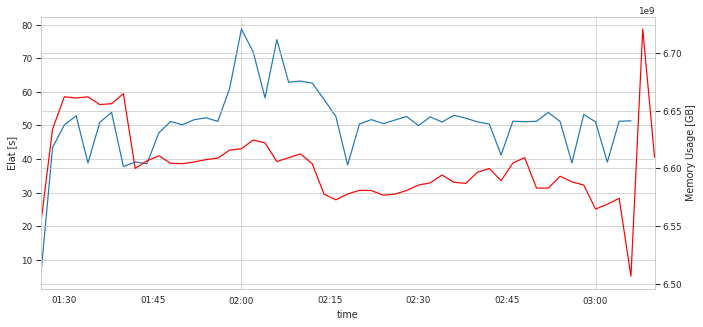

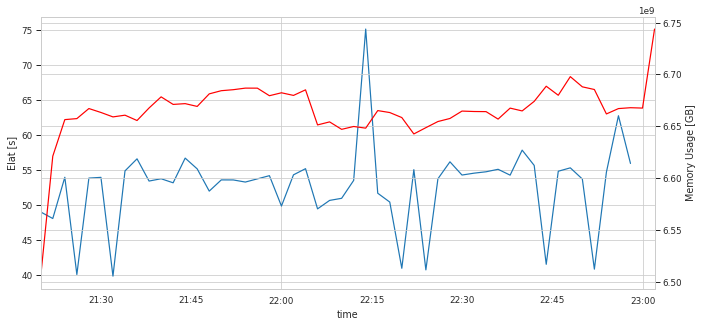

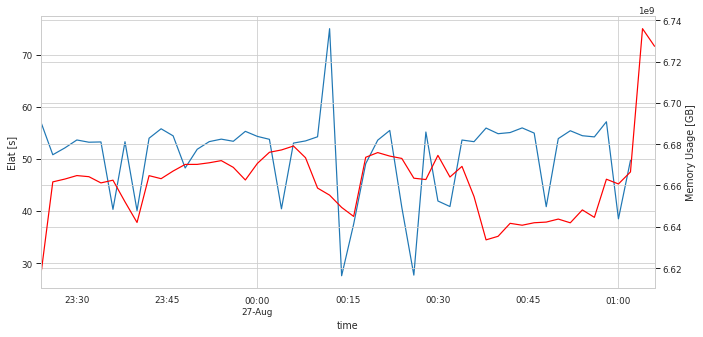

In [42]:
for exp in experimentes:
    fig = plt.figure(figsize=(11,5))
    gs = fig.add_gridspec(ncols=1, nrows=1,hspace=0.20)
    X = activations[activations["experiment"] == exp]
    ax = fig.add_subplot(gs[0])
    X.set_index("start").resample("2min")["ELat"].mean().plot(ax=ax)
    ax.set_ylabel("Elat [s]")
    ax.set_xlabel("time")
    X = perfromance[perfromance["experiment"] == exp]
    X.index = X.index.shift(-2,freq="h")
    cpu = X.resample("2min")["node_memory_Active"].mean()
    ax = ax.twinx()
    ax.set_ylabel("Memory Usage [GB]")
    
    cpu.plot(ax=ax,color="r")